![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: Natural Language Processing (NLP)

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions

### Task: Sourcing

The first stage involves sourcing and reading the textual content of scientific papers. You find an example pdf file in ``../lit/nonanswers.pdf``. Please [download](https://scholar.google.de/) and analyze at least one additional paper of your choice (make sure to commit the paper to your repository).

Use an appropriate PDF reading library or tool to programmatically extract the text. You can find an example below, however, you are free to use any Python library you like.

In [8]:
# Step 1: Install pdfminer.six if you haven't already
# You can install it using conda or pip, see 
  # https://anaconda.org/conda-forge/pdfminer.six
  # https://pypi.org/project/pdfminer.six/

# Step 2: Import the required module
from pdfminer.high_level import extract_text

# Step 3: Extract text from PDF file
extracted_text = extract_text('../lit/nonanswers.pdf')
print(extracted_text[0:80])

“Let me get back to you” –
A machine learning approach to measuring
non-answers



### Task: Pre-processing

Pre-processing is a critical step aimed at cleaning and preparing the text data for analysis. Steps that you should consider:

* Removing punctuation, numbers and special characters using regular expressions.
* Converting all the text to a uniform case (usually lower case) to ensure that the analysis is not case-sensitive.
* Stop word removal, i.e. eliminating commonly used words (e.g., 'and', 'the', 'is') that do not contribute significantly to the overall meaning and can skew the analysis.
* Other potential pre-processing steps might include stemming and lemmatization, depending on the specific requirements and goals of the analysis. (optional)

In [5]:
import re
from pdfminer.high_level import extract_text
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Remove punctuation, numbers, special characters,
    convert to lowercase, and remove stop words.
    """
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stop words
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Path to PDF file
pdf_path = '../lit/Webscraping.pdf'

# Extract text from PDF
text = extract_text(pdf_path)

# Clean the extracted text
cleaned_text = clean_text(text)

# Print the cleaned text
print(cleaned_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


b riefings bioinf ormatics vol advance access published april doibibbbt web scraping technologies api world daniel glezpen ana lia lourenco hugo lo pezferna ndez miguel reboirojato florentino fdezriverola submitted th february received revised form th march abstract web services de facto standard biomedical data integration however data integration scenarios cannot fully covered web services number web databases tools support web services existing web services cover possible user data demands consequence web data scraping one oldest techniques extracting web contents still position offer valid valuable service wide range bioinformatics applications ranging simple extraction robots online metaservers art icle reviews existing scraping frameworks tools identifying strengths limitations terms extrac tion capabilities main focus set showing straightforward today set data scraping pipeline minimal programming effort answer number practical needs exemplification purposes introduce biomedical

### Task: Analysis

The final stage is the analysis of the pre-processed text, in order to extract meaningful context. This may involve:

* Frequency Analysis: Determining the most commonly occurring words or phrases, which can provide initial insights into the primary focus areas of the papers. Consider, e.g. a word cloud as a visualization.
* Contextual Analysis: Using more advanced NLP techniques such as Word Embedding or Topic Modeling to understand the context of the papers.
* Sentiment analysis: We would expect that scientific papers are written in a neutral tone, can you confirm this?
* Summarization: Employing algorithms to generate concise summaries of the papers, capturing the key points and findings.

Pick any method that you like (you are allowed to use ChatGPT's API as well).

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


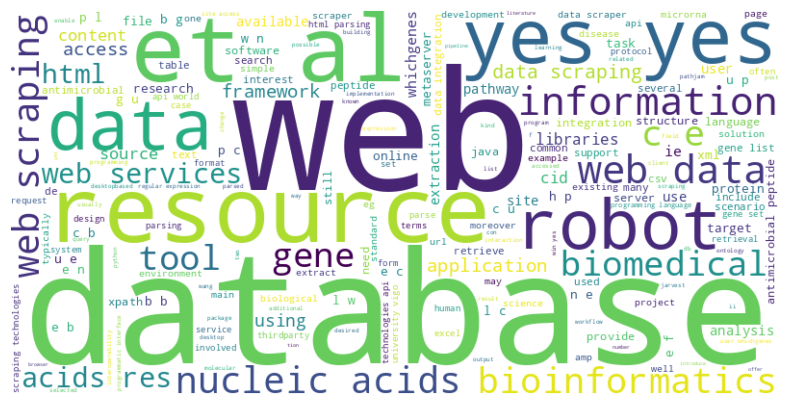

[('web', 105), ('data', 85), ('c', 52), ('yes', 51), ('scraping', 50), ('e', 43), ('b', 36), ('r', 34), ('et', 32), ('al', 32)]
Topic 0: ['datum', 'information', 'access', 'bioinformatics', 'web', 'win', 'resource', 'al', 'et', 'yes']
Topic 1: ['use', 'analysis', 'tool', 'resource', 'university', 'biomedical', 'service', 'scrape', 'datum', 'web']
Topic 2: ['query', 'xml', 'list', 'gene', 'information', 'peptide', 'database', 'scrape', 'web', 'antimicrobial']
Topic 3: ['whichgene', 'et', 'al', 'access', 'database', 'acid', 'nucleic', 'gene', 'datum', 'web']
Topic 4: ['xpath', 'java', 'datum', 'framework', 'parse', 'robot', 'language', 'html', 'http', 'web']
Sentiment(polarity=0.10424218374218375, subjectivity=0.3604994899280613)
b riefings bioinf ormatics vol advance access published april doibibbbt web scraping technologies api world daniel glezpen ana lia lourenco hugo lo pezferna ndez miguel reboirojato florentino fdezriverola submitted th february received revised form th march abst

In [4]:
import re
from pdfminer.high_level import extract_text
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from transformers import pipeline

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Remove punctuation, numbers, special characters,
    convert to lowercase, and remove stop words.
    """
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stop words
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Path to PDF file
pdf_path = '../lit/Webscraping.pdf'

# Extract text from PDF
text = extract_text(pdf_path)

# Clean the extracted text
cleaned_text = clean_text(text)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display the most common words
word_counts = Counter(cleaned_text.split())
most_common_words = word_counts.most_common(10)
print(most_common_words)



# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Process text with spaCy
doc = nlp(cleaned_text)

# Tokenize and remove stopwords, lemmatize tokens
texts = [' '.join([token.lemma_ for token in sent if not token.is_stop and token.is_alpha]) for sent in doc.sents]

# Vectorize text using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(texts)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}: {[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]}")




# Function to get sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

# Get sentiment of the cleaned text
sentiment = get_sentiment(cleaned_text)
print(sentiment)



# Tokenize the text into sentences
sentences = cleaned_text.split(". ")

# Calculate the importance score for each sentence (e.g., based on sentence length or other criteria)
# You can customize this scoring method as needed
sentence_scores = {}
for sentence in sentences:
    # Example: Score based on sentence length
    sentence_scores[sentence] = len(sentence)

# Sort sentences by importance score (descending order)
sorted_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)

# Select the top K sentences (adjust K as needed)
top_k = 3
summary_sentences = [sentence for sentence, _ in sorted_sentences[:top_k]]

# Generate the summary
summary = ". ".join(summary_sentences)

# Print the summary
print(summary)

